In [1]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from scipy.interpolate import griddata  
import numpy.ma as ma
import folium
from folium.plugins import HeatMap
from mpltools import color
import os 
import seaborn as sns;
import math;

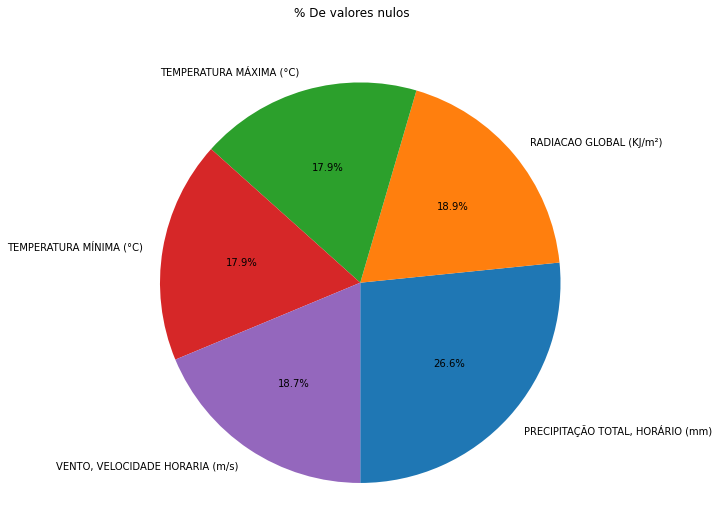

In [2]:

dfConsolidado = pd.read_csv("../datasets/consolidado.csv",";");  

dados = dfConsolidado.isnull().sum(); 
 


# matplotlib-exemplo-41
# grafico de pizza
datax = np.array([dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], dados['RADIACAO GLOBAL (KJ/m²)'], dados['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'],dados['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], dados['VENTO, VELOCIDADE HORARIA (m/s)']])
labels = [ 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA MÁXIMA (°C)', 'TEMPERATURA MÍNIMA (°C)', 'VENTO, VELOCIDADE HORARIA (m/s)']
explode = ( 0, 0, 0, 0,0 )
colrs=['cyan', 'tan', 'wheat','green','blue' ]
# graficos
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(datax, explode=explode, labels=labels, autopct='%1.1f%%',startangle=270)
ax.axis('equal') # mantenha um circulo
fig.suptitle("% De valores nulos");
#fig.savefig('data/pizza.png', dpi=125)
 

In [12]:
from bokeh.palettes import magma, Category10                  # paleta de cores
 
dados = dfConsolidado.isnull().sum(); 
print(dados) 
    
# cria a data
x_data = dados[2]
y_data = dados[1]

data = ColumnDataSource(data=dict(x_data=x_data, y_data=y_data))  

p = figure(x_range=x_data,
           #plot_width=600,
           plot_height=450, 
           #toolbar_location=None, 
           title="% De valores nulos"
          )  # cria figura
p.vbar(x='x_data', 
       top='y_data', 
       width=0.9, 
       source=data, 
       legend_field="x_data",
       line_color='white',
       #fill_color=factor_cmap('x_data', palette=viridis(10), factors=x_data)  # cores
       #fill_color=factor_cmap('x_data', palette=magma(10), factors=x_data)
       #fill_color=factor_cmap('x_data', palette=Spectral6[10], factors=x_data)   # 6 cores
       fill_color=factor_cmap('x_data', palette=Category10[10], factors=x_data)
      )
#
#p.xaxis.major_label_orientation = "vertical"  # legend orientation
#p.legend.orientation = "horizontal"
p.xaxis.major_label_orientation = np.math.pi/4   # legend orientation by angle pi/x
#p.legend.location = "top_center"
show(p)

Data                                              0
REGIAO                                            0
ESTADO                                            0
CODIGO                                            0
NOME                                              0
LATITUDE                                        366
LONGITUDE                                       366
ALTITUDE                                        366
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)              12333
RADIACAO GLOBAL (KJ/m²)                        8746
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)     8296
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)     8298
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)       9420
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)       9422
VENTO, VELOCIDADE HORARIA (m/s)                8680
dtype: int64


NameError: name 'ColumnDataSource' is not defined

In [97]:
anos = {}
for ano in dados_diarios.iloc[:,0].unique():
    idxs = dados_diarios.iloc[:, 0] == ano
    anos[ano] = dados_diarios[idxs]

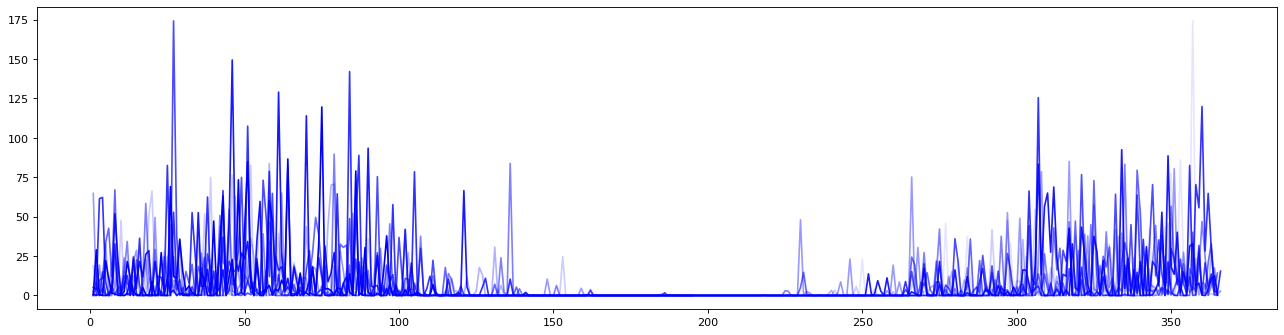

In [130]:
figure(figsize=(20, 5), dpi=80)
for ano, alpha in [ (a, (a-2013+1)/10) for a in dados_diarios.iloc[:,0].unique()]:
    plt.plot(anos[ano].iloc[:,1], anos[ano].iloc[:, 14], 'b', alpha=alpha)

In [77]:
import locale
locale.getlocale()

('pt_BR', 'UTF-8')